In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feather
import os
plt.style.use('seaborn-colorblind')
%matplotlib inline
from feature_cleaning import missing_data as ms


## 读取合并后的表数据与类别特征数据

In [4]:
X=pd.read_csv('X.csv')
X_test=pd.read_csv('X_test.csv')

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (405,408,409,416,420,421,422,423,424,426,427,428,429,430,431,432,433) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (404,407,408,415,419,420,421,422,423,425,426,427,428,429,430,431,432) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
cat=pd.read_csv('cat.csv')
cat=cat.cat.values.tolist()

## 缺失值的检验


In [6]:
# only variable Age has missing values, totally 177 cases
# result is saved at the output dir (if given)

ms.check_missing(data=X,output_path=r'./output/')

result saved at ./output/ missing.csv


,total missing,proportion
TransactionID,0,0.000000
isFraud,0,0.000000
TransactionDT,0,0.000000
TransactionAmt,0,0.000000
ProductCD,0,0.000000
...,...,...
id_37,449555,0.761261
id_38,449555,0.761261
DeviceType,449730,0.761557
DeviceInfo,471874,0.799055


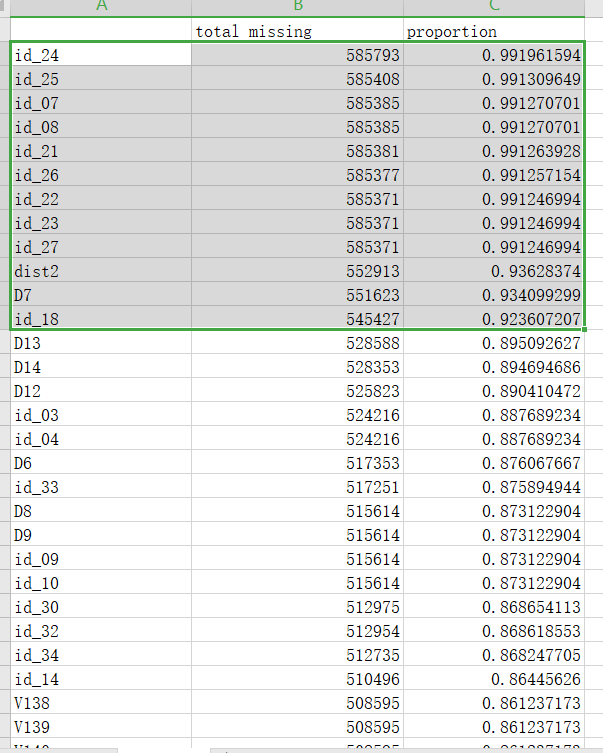

在kaggle比赛中，一般不会轻易去删除缺失值很多的特征，只有这类缺失的实在太多的特征才会去做一些清理的工作，但是也不能轻易就直接删除，比如X的总样本是50万+，即使缺失了99%，剩下1%，那么这1%也有5000+的样本存在，说不定就有某个特征在这5000+的样本上区分度特别高，毕竟在排行榜上很多时候差了千一都能差个几十一百名的。。。所以我们后续需要对这些特征进行删除与不删除的操作，并且比较不同情况下local cv的情况从而决定是否删除，目前暂时就先记录一下

In [7]:
drops=['id_24','id_25','id_07','id_08','id_21','id_26','id_22','id_23','id_27','dist2','D7','id_18']

In [8]:
pd.DataFrame(drops,columns=['drops']).to_csv('.\output\drops.csv',index=False)

In [11]:
X

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,had_id
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,1.0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,1.0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,F,F,T,T,desktop,Windows,1.0
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,F,F,T,T,desktop,NaN,1.0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# None

## Listwise deletion  
excluding all cases (listwise) that have missing values

In [12]:
# 177 cases which has NA has been dropped 
data2 = ms.drop_missing(data=X)
data2.shape

(0, 435)

## Add a variable to denote NA
creating an additional variable indicating whether the data was missing for that observation

In [5]:
# Age_is_NA is created, 0-not missing 1-missing for that observation
data3 = ms.add_var_denote_NA(data=data,NA_col=['Age'])
print(data3.Age_is_NA.value_counts())
data3.head(8)

0    714
1    177
Name: Age_is_NA, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Fare,Age_is_NA
0,0,3,male,22.0,1,7.2500,0
1,1,1,female,38.0,1,71.2833,0
2,1,3,female,26.0,0,7.9250,0
3,1,1,female,35.0,1,53.1000,0
4,0,3,male,35.0,0,8.0500,0
5,0,3,male,NaN,0,8.4583,1
6,0,1,male,54.0,0,51.8625,0
7,0,3,male,2.0,3,21.0750,0


In [17]:
# Age_is_NA is created, 0-not missing 1-missing for that observation
data3 = ms.add_var_denote_NA(data=X,NA_col=['id_34'])
print(data3.id_34_is_NA.value_counts())
data3.head(8)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,had_id,id_34_is_NA
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,1.0,0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,1.0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,F,F,T,T,desktop,Windows,1.0,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,F,F,T,T,desktop,NaN,1.0,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,1280x800,match_status:2,T,F,T,T,desktop,MacOS,1.0,0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,1366x768,match_status:2,T,F,T,T,desktop,Windows,1.0,0
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,1920x1080,match_status:2,T,F,T,T,mobile,NaN,1.0,0


1    512735
0     77805
Name: id_34_is_NA, dtype: int64


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,had_id,id_34_is_NA
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,1.0,0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,1.0,0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,F,F,T,T,desktop,Windows,1.0,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,F,F,T,T,desktop,NaN,1.0,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,1280x800,match_status:2,T,F,T,T,desktop,MacOS,1.0,0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,1366x768,match_status:2,T,F,T,T,desktop,Windows,1.0,0
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,1920x1080,match_status:2,T,F,T,T,mobile,NaN,1.0,0


## Arbitrary Value Imputation
Replacing the NA by arbitrary values

In [6]:
data4 = ms.impute_NA_with_arbitrary(data=data,impute_value=-999,NA_col=['Age'])
data4.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_-999
0,0,3,male,22.0,1,7.2500,22.0
1,1,1,female,38.0,1,71.2833,38.0
2,1,3,female,26.0,0,7.9250,26.0
3,1,1,female,35.0,1,53.1000,35.0
4,0,3,male,35.0,0,8.0500,35.0
5,0,3,male,NaN,0,8.4583,-999.0
6,0,1,male,54.0,0,51.8625,54.0
7,0,3,male,2.0,3,21.0750,2.0


## Mean/Median/Mode Imputation
Replacing the NA by mean/median/mode of that variable

In [7]:
print(data.Age.median())
data5 = ms.impute_NA_with_avg(data=data,strategy='median',NA_col=['Age'])
data5.head(8)

28.0


,Survived,Pclass,Sex,Age,SibSp,Fare,Age_impute_median
0,0,3,male,22.0,1,7.2500,22.0
1,1,1,female,38.0,1,71.2833,38.0
2,1,3,female,26.0,0,7.9250,26.0
3,1,1,female,35.0,1,53.1000,35.0
4,0,3,male,35.0,0,8.0500,35.0
5,0,3,male,NaN,0,8.4583,28.0
6,0,1,male,54.0,0,51.8625,54.0
7,0,3,male,2.0,3,21.0750,2.0


##  End of distribution Imputation
replacing the NA by values that are at the far end of the distribution of that variable
calculated by mean + 3*std

In [8]:
data6 = ms.impute_NA_with_end_of_distribution(data=data,NA_col=['Age'])
data6.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_impute_end_of_distri
0,0,3,male,22.0,1,7.2500,22.00000
1,1,1,female,38.0,1,71.2833,38.00000
2,1,3,female,26.0,0,7.9250,26.00000
3,1,1,female,35.0,1,53.1000,35.00000
4,0,3,male,35.0,0,8.0500,35.00000
5,0,3,male,NaN,0,8.4583,73.27861
6,0,1,male,54.0,0,51.8625,54.00000
7,0,3,male,2.0,3,21.0750,2.00000


##  Random Imputation
replacing the NA with random sampling from the pool of available observations of the variable


In [9]:
data7 = ms.impute_NA_with_random(data=data,NA_col=['Age'])
data7.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare,Age_random
0,0,3,male,22.0,1,7.2500,22.0
1,1,1,female,38.0,1,71.2833,38.0
2,1,3,female,26.0,0,7.9250,26.0
3,1,1,female,35.0,1,53.1000,35.0
4,0,3,male,35.0,0,8.0500,35.0
5,0,3,male,NaN,0,8.4583,28.0
6,0,1,male,54.0,0,51.8625,54.0
7,0,3,male,2.0,3,21.0750,2.0
